In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib import cm
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN

In [2]:
#loading the dataset
google_review = pd.read_csv('google_review_ratings.csv')
print('\nFirst 5 rows of the dataset')
google_review.head() #first 5 rows of the dataset


First 5 rows of the dataset


,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [3]:
#summary statistics of numerical columns
print('\nSummary Statistics')
google_review.describe()


Summary Statistics


,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


In [4]:
#basic information of the dataset
google_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [5]:
#checking for missing values
print("\nMissing values")
google_review.isnull().sum()


Missing values


User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       1
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64

In [6]:
#display the number of rows and columns of the dataset
num_rows, num_columns = google_review.shape
print(f'Number of Rows: {num_rows}')
print(f'Number of Columns: {num_columns}')

Number of Rows: 5456
Number of Columns: 26


In [7]:
#display the datatypes of the columns
print('\nData Types of the Columns')
google_review.dtypes


Data Types of the Columns


User            object
Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11     object
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
Unnamed: 25    float64
dtype: object

In [8]:
# Rename columns for better understanding
column_names = {
    'User': 'UserID',
    'Category 1': 'Churches',
    'Category 2': 'Resorts',
    'Category 3': 'Beaches',
    'Category 4': 'Parks',
    'Category 5': 'Theatres',
    'Category 6': 'Museums',
    'Category 7': 'Malls',
    'Category 8': 'Zoos',
    'Category 9': 'Restaurants',
    'Category 10': 'Pubs_Bars',
    'Category 11': 'Local_Services',
    'Category 12': 'Pizza_Burger_Shops',
    'Category 13': 'Hotels',
    'Category 14': 'Juice_Bars',
    'Category 15': 'Art_Galleries',
    'Category 16': 'Dance_Clubs',
    'Category 17': 'Swimming_Pools',
    'Category 18': 'Gyms',
    'Category 19': 'Bakeries',
    'Category 20': 'Beauty_Spa',
    'Category 21': 'Cafes',
    'Category 22': 'View_Points',
    'Category 23': 'Monuments',
    'Category 24': 'Gardens'
}
google_review.rename(columns=column_names, inplace=True)

In [9]:
# Drop irrelevant columns for simplicity
google_review = google_review.drop(columns=['UserID', 'Unnamed: 25'], errors='ignore')

# Convert all columns to numeric, handling errors by coercing invalid values to NaN
google_review = google_review.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (optional: can use different strategy to handle missing values)
google_review.dropna(inplace=True)


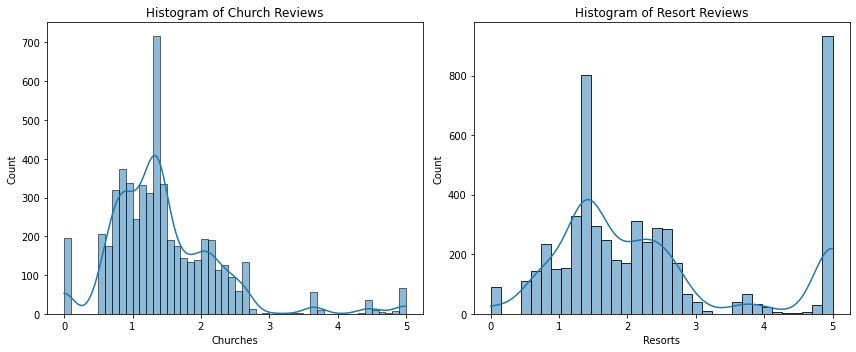

In [10]:
# 2. Histogram Plot for any 2 columns (church and resort)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(google_review['Churches'], kde=True)
plt.title('Histogram of Church Reviews')

plt.subplot(1, 2, 2)
sns.histplot(google_review['Resorts'], kde=True)
plt.title('Histogram of Resort Reviews')

plt.tight_layout()
plt.show()

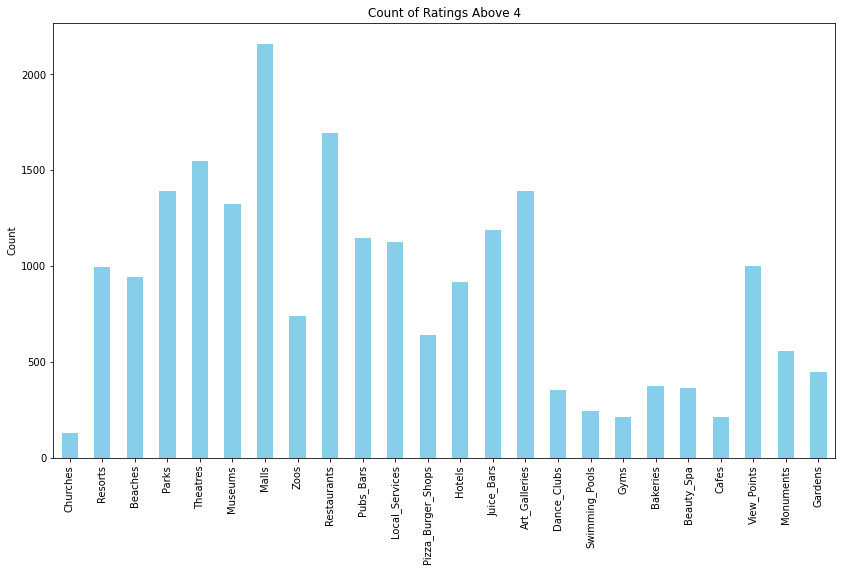

In [11]:
#Count Plot for Categories with Ratings Above a Threshold
threshold = 4
high_ratings = (google_review > threshold).sum()
plt.figure(figsize=(14, 8))
high_ratings.plot(kind='bar', color='skyblue')
plt.title(f'Count of Ratings Above {threshold}')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

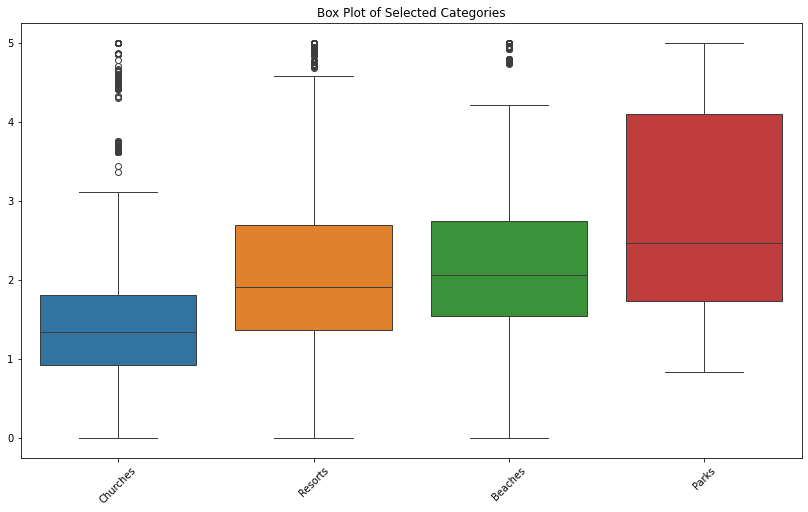

In [12]:
# Box Plot for Selected Categories
plt.figure(figsize=(14, 8))
sns.boxplot(data=google_review[['Churches', 'Resorts', 'Beaches', 'Parks']])
plt.title('Box Plot of Selected Categories')
plt.xticks(rotation=45)
plt.show()

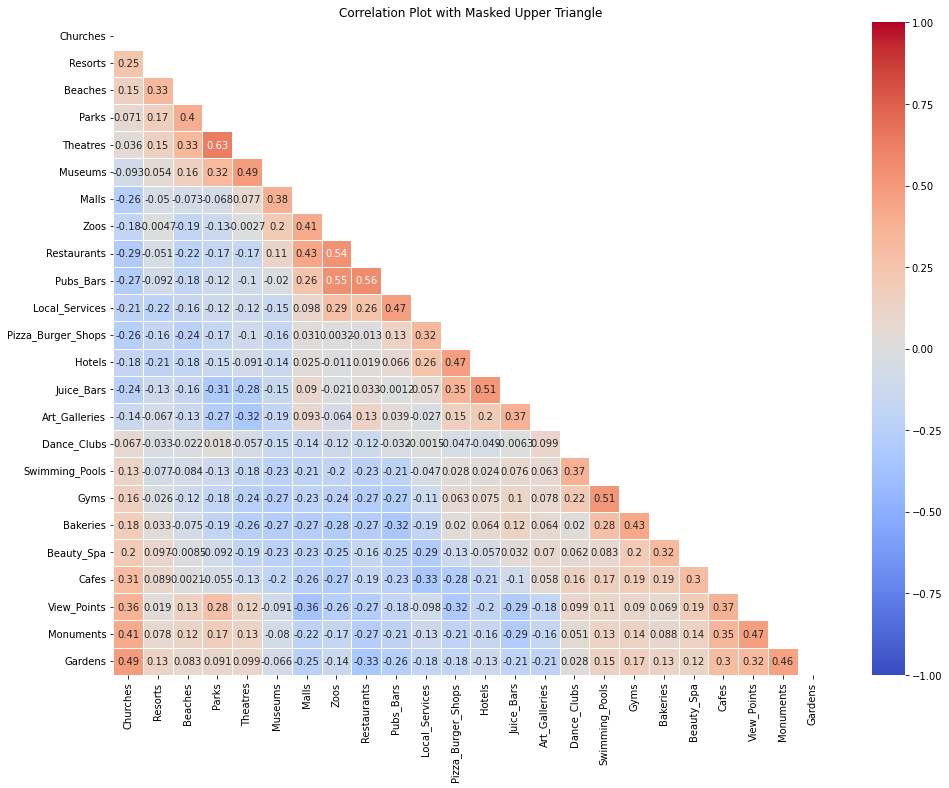

In [13]:
# 1. Correlation Plot
plt.figure(figsize=(16, 12))
corr_matrix = google_review.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask to hide upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Plot with Masked Upper Triangle')
plt.show()

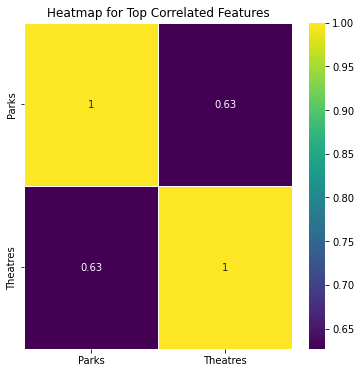

In [14]:
# Heatmap for Top Correlated Features
top_corr_features = corr_matrix[abs(corr_matrix) > 0.6].stack().reset_index()
top_corr_features = top_corr_features[top_corr_features['level_0'] != top_corr_features['level_1']]  # Remove self-correlation
if not top_corr_features.empty:
    plt.figure(figsize=(6,6))
    sns.heatmap(google_review[top_corr_features['level_0'].unique()].corr(), annot=True, cmap='viridis', linewidths=0.5)
    plt.title('Heatmap for Top Correlated Features')
    plt.show()

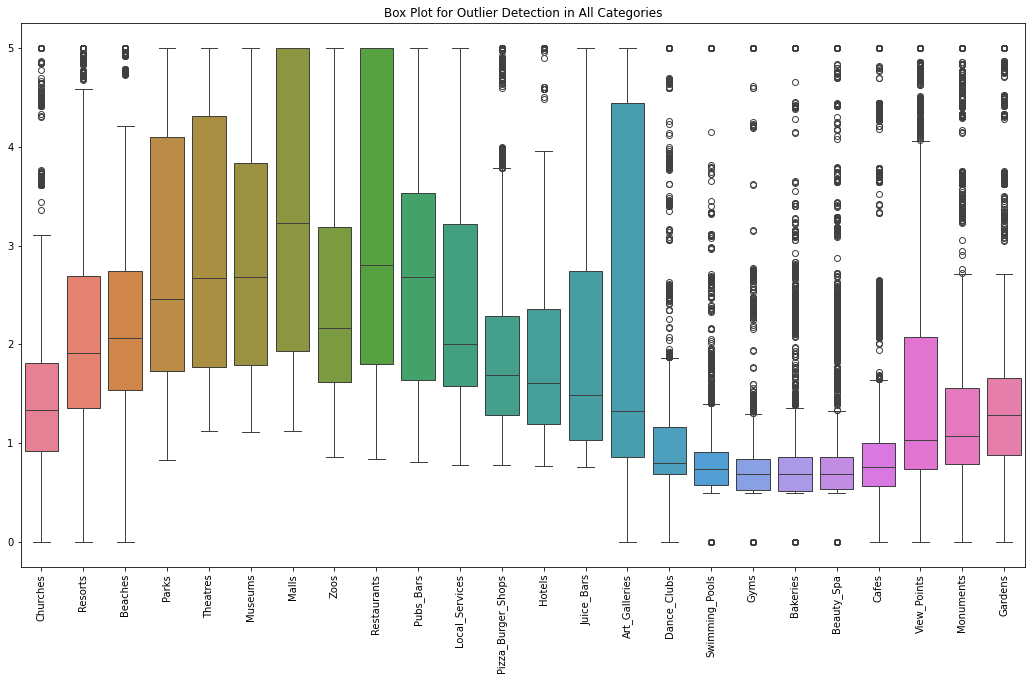

In [15]:
# Outlier Detection using Box Plot for All Categories
plt.figure(figsize=(18, 10))
sns.boxplot(data=google_review)
plt.title('Box Plot for Outlier Detection in All Categories')
plt.xticks(rotation=90)
plt.show()

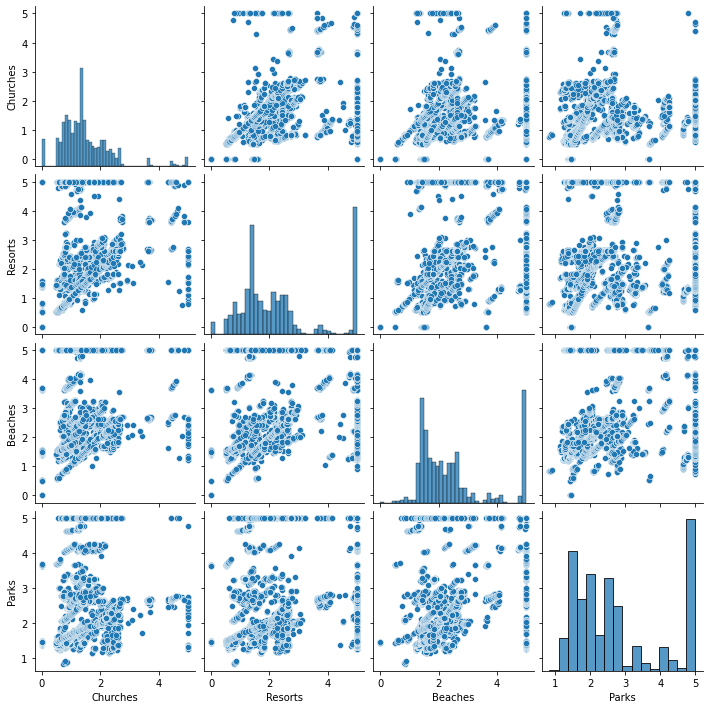

In [16]:
# Pairwise Scatter Plot for a Subset of Categories
subset = google_review[['Churches', 'Resorts', 'Beaches', 'Parks']]
sns.pairplot(subset)
plt.show()

In [17]:
# Standardize the dataset after outlier detection
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_standardized = pd.DataFrame(scaler.fit_transform(google_review), columns=google_review.columns)

In [18]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
dataset_pca = pca.fit_transform(dataset_standardized)
dataset_pca = pd.DataFrame(dataset_pca, columns=['PCA1', 'PCA2'])

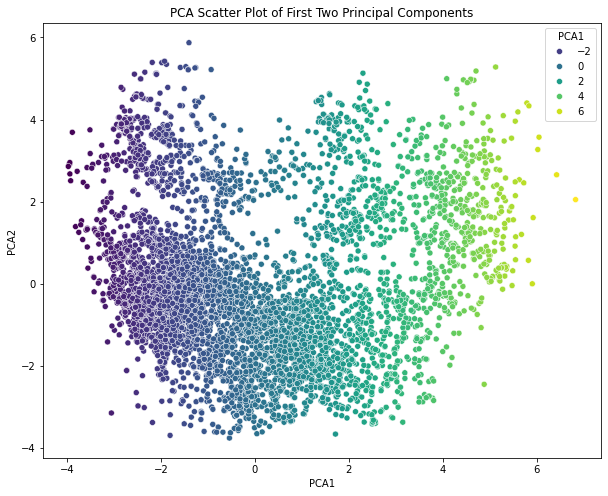

In [19]:
# Scatter Plot of PCA Components with Different Colors
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=dataset_pca, hue='PCA1', palette='viridis')
plt.title('PCA Scatter Plot of First Two Principal Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

### K-Means Clustering

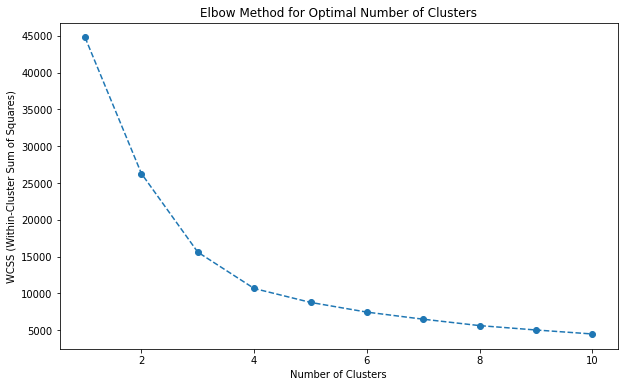

In [20]:
from sklearn.cluster import KMeans
# Elbow Method for KMeans Clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(dataset_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

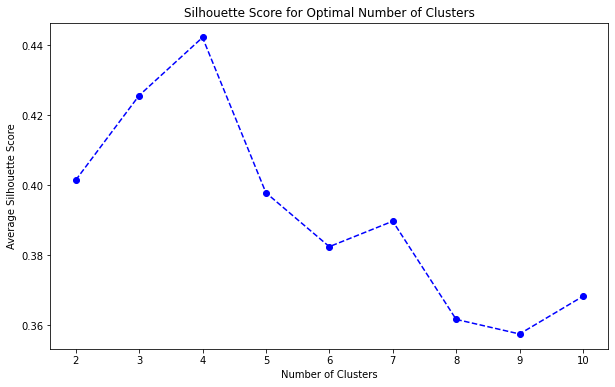

In [21]:
from sklearn.metrics import silhouette_score
# Silhouette Score for KMeans Clustering
silhouette_avg_scores = []
for i in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(dataset_pca)
    silhouette_avg = silhouette_score(dataset_pca, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_avg_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

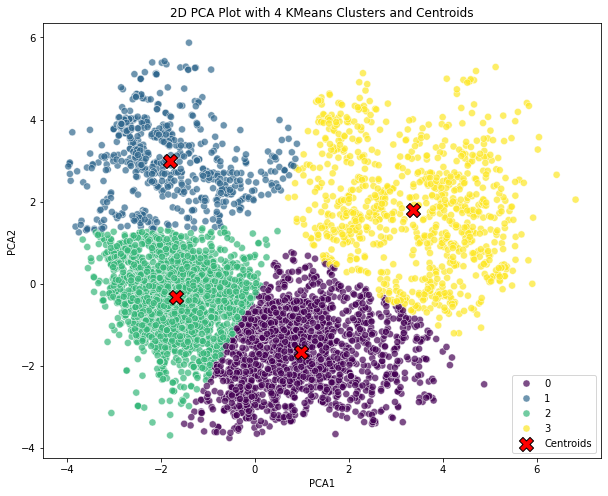

In [22]:
# Suggested number of clusters based on elbow and silhouette score
optimal_clusters = 4  # Assuming optimal number is 3 based on the elbow and silhouette method

# KMeans Clustering with Suggested Number of Clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(dataset_pca)
dataset_pca['Cluster'] = cluster_labels
centroids = kmeans.cluster_centers_

# 2D Plot of PCA Components with KMeans Clusters and Centroids
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=dataset_pca, palette='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids', edgecolor='k')
plt.title(f'2D PCA Plot with {optimal_clusters} KMeans Clusters and Centroids')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

<ipython-input-23-b657b8b89b8e>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', optimal_clusters)


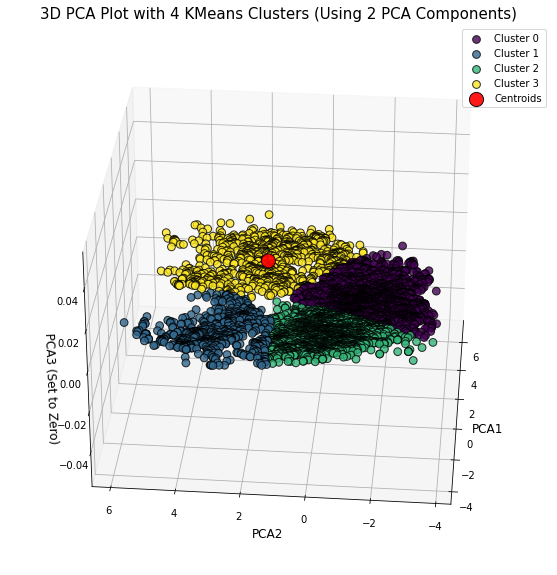

In [23]:
# 3D Plot of PCA Components with KMeans Clusters (Using 2 PCA Components)
from matplotlib import cm
# 3D Plot of PCA Components with KMeans Clusters (Using 2 PCA Components)
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
colors = cm.get_cmap('viridis', optimal_clusters)
for cluster in range(optimal_clusters):
    cluster_points = dataset_pca[dataset_pca['Cluster'] == cluster]
    ax.scatter(cluster_points['PCA1'], cluster_points['PCA2'], np.zeros_like(cluster_points['PCA1']), 
               label=f'Cluster {cluster}', s=60, alpha=0.8, edgecolors='k', color=colors(cluster / optimal_clusters))

# Plotting centroids
ax.scatter(centroids[:, 0], centroids[:, 1], np.zeros_like(centroids[:, 0]), 
           marker='o', c='red', s=200, alpha=0.9, edgecolors='k', label='Centroids')

ax.set_title(f'3D PCA Plot with {optimal_clusters} KMeans Clusters (Using 2 PCA Components)', fontsize=15)
ax.set_xlabel('PCA1', fontsize=12)
ax.set_ylabel('PCA2', fontsize=12)
ax.set_zlabel('PCA3 (Set to Zero)', fontsize=12)
ax.legend()
ax.view_init(30, 185)  # Adjust the angle for a better 3D perspective
plt.show()

### DBSCAN 

In [24]:
# Elbow Curve for DBSCAN (Using k-Nearest Neighbors Method)
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(dataset_pca)
distances, indices = neighbors_fit.kneighbors(dataset_pca)

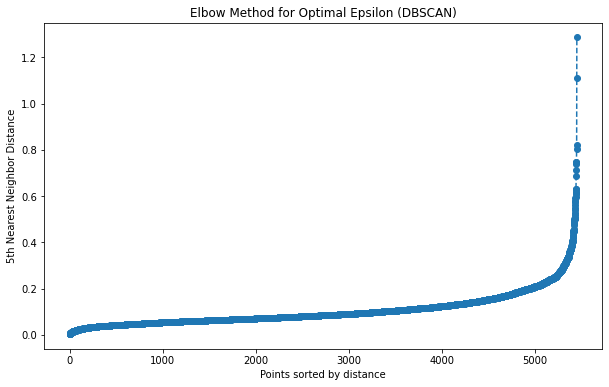

In [25]:
# Sort distances and plot elbow curve to find optimal epsilon
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances, marker='o', linestyle='--')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('Elbow Method for Optimal Epsilon (DBSCAN)')
plt.show()

In [26]:
# Silhouette Score for DBSCAN
from sklearn.cluster import KMeans, DBSCAN
eps_values = np.arange(0.1, 2.0, 0.1)
silhouette_scores = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    cluster_labels = dbscan.fit_predict(dataset_pca)
    if len(set(cluster_labels)) > 1:  # At least 2 clusters are needed for silhouette score
        silhouette_avg = silhouette_score(dataset_pca, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)  # Invalid silhouette score for single cluster

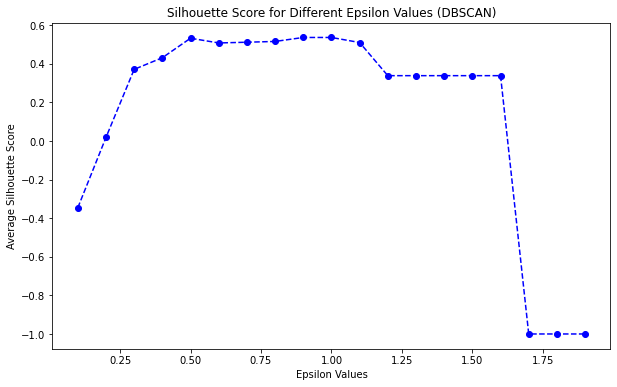

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Epsilon Values')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Different Epsilon Values (DBSCAN)')
plt.show()

In [28]:
# DBSCAN Clustering with Optimal Epsilon
optimal_eps = 0.3 # Replace with the chosen optimal epsilon from the elbow method
min_samples = 5  # You can adjust this value if needed

dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(dataset_pca)
dataset_pca['DBSCAN_Cluster'] = dbscan_labels

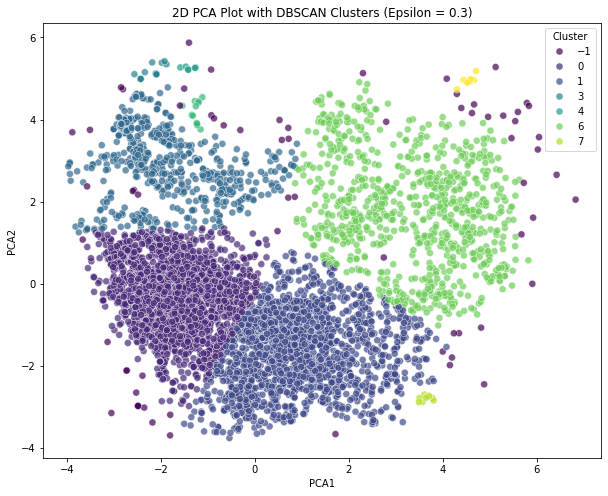

In [29]:
# 2D Plot of PCA Components with DBSCAN Cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=dataset_pca, palette='viridis', s=50, alpha=0.7)
plt.title(f'2D PCA Plot with DBSCAN Clusters (Epsilon = {optimal_eps})')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

Total number of noise points detected: 69


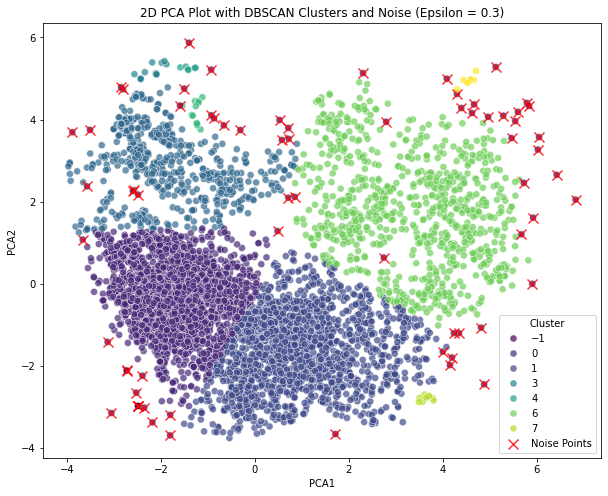

In [30]:
# Noise Detection
noise_points = dataset_pca[dataset_pca['DBSCAN_Cluster'] == -1]
print(f'Total number of noise points detected: {len(noise_points)}')

# 2D Plot of PCA Components with DBSCAN Clusters and Noise
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=dataset_pca, palette='viridis', s=50, alpha=0.7)
plt.scatter(noise_points['PCA1'], noise_points['PCA2'], color='red', marker='x', s=100, label='Noise Points', alpha=0.8)
plt.title(f'2D PCA Plot with DBSCAN Clusters and Noise (Epsilon = {optimal_eps})')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()